# Exercise 1: Identify 5 features and 5 data visualization

In [11]:
import pandas as panda
import matplotlib
from matplotlib import pyplot as plt
plt.close('all')

# Feature - Number of trips in each municipality

In [20]:
dataframe = panda.read_csv("Ruter_data.csv", delimiter=';')

In [13]:
# Data Points with 6000 records and 17 Columns
dataframe.shape

(6000, 17)

In [14]:
#write the first 5 line of data
dataframe.head(3)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6


In [15]:
# A quick analyzes for the number of trips per the municipality -> top is "Lillestrøm"
dataframe.Kommune.describe()

count           6000
unique            34
top       Lillestrøm
freq            1094
Name: Kommune, dtype: object

In [16]:
# A quick analyzes for the number of trips per Dato -> top is "18/08/2020"
dataframe.Dato.describe()

count           6000
unique            90
top       18/08/2020
freq             112
Name: Dato, dtype: object

In [17]:
# A quick analyzes for the number of trips per Dato -> top is the buss nr.100
dataframe.Linjenavn.describe()

count     6000
unique     150
top        100
freq       465
Name: Linjenavn, dtype: object

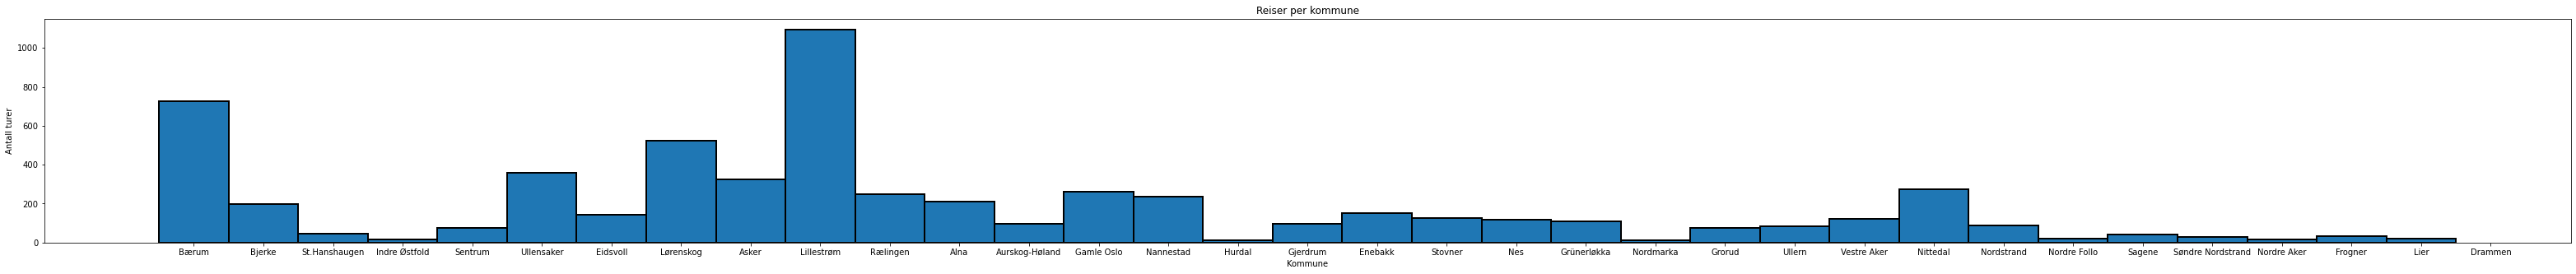

In [18]:
#A trip is a journey from one stop to the next stop
#Feature: Show the number of trips per municipality in the period in the log file
fig = plt.figure(figsize=(55,5))
ax = fig.add_subplot(111)
plt.hist(dataframe.Kommune, bins=33, rwidth=40, align='left', edgecolor='black', linewidth=2)
plt.xlabel('Kommune')
plt.ylabel('Antall turer')
plt.title('Reiser per kommune')
plt.show()

In [19]:
#Data Cleaning.
Ruter = panda.read_csv("Ruter_data.csv", delimiter=';', parse_dates = ["Dato","Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"])
#Ruter.head()
r1 = Ruter[Ruter.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra != ":"]
r2 = r1[r1.Tidspunkt_Faktisk_Avgang_Holdeplass_Fra != ":"]
r3 = r2[r2.Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra != ":"]
ruter = r3[r3.Tidspunkt_Planlagt_Avgang_Holdeplass_Fra != ":"]
#routes with all valid date and time?
ruter.shape

(5949, 17)

# Feature - Trips Per Line Type & Capacity Utilized

In [48]:
#Eksempel fra datasettet for visualisering
dataframe.sample(1)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
109,30014-2020-07-30T17:35:00+02:00,30/07/2020,Viken,Nordøst,Lillestrøm,Sagdalen skole,Sagdalen,Lokal,Viken,110,1,18:21:43,18:21:51,18:19:00,18:19:00,106,9


In [42]:
#Oppretter liste for prosentverdier med kapasitet utnyttet per tur
kapasitetUtnyttet = []

#Legger verdiene inn i listen og gjør om til prosent
for x in dataframe:
    kapasitetUtnyttet.append((dataframe.Passasjerer_Ombord / dataframe.Kjøretøy_Kapasitet) * 100)    
    

Text(0.5, 1.0, 'Kapasitet utnyttet per tur')

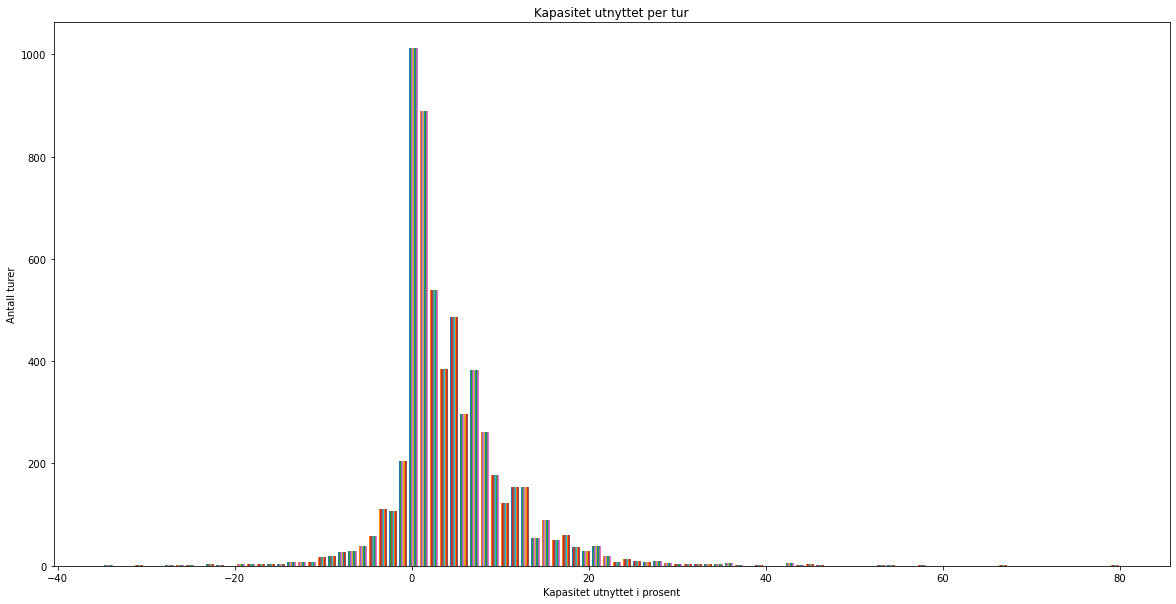

In [50]:
#Tegner Plot som viser hvor mye av kapasiteten som har blitt utnyttet på turene 
fig, ax = plt.subplots(figsize = (20, 10))
plt.hist(kapasitetUtnyttet, bins = 100)
plt.ylabel("Antall turer")
plt.xlabel("Kapasitet utnyttet i prosent")
plt.title("Kapasitet utnyttet per tur")

In [36]:
#Antall turer per linjetype
ekspressTurer = dataframe[dataframe.Linjetype == "Ekspress"]
lokaleTurer = dataframe[dataframe.Linjetype == "Lokal"]
skoleTurer = dataframe[dataframe.Linjetype == "Skole"]
nattTurer = dataframe[dataframe.Linjetype == "Natt"]

In [37]:
#Sjekker antall elementer av typen ekspress
ekspressTurer.shape

(193, 17)

In [38]:
#Sjekker antall elementer av typen lokal
lokaleTurer.shape

(5741, 17)

In [39]:
#Sjekker antall elementer av typen skole
skoleTurer.shape

(63, 17)

In [40]:
#Sjekker antall elementer av typen natt
nattTurer.shape

(3, 17)

In [41]:
#Vi ser at det er 193 ekspressturer, 5741 lokale turer, 63 skoleturer og 3 natturer, hvilket samsvarer med plottet.
plot.hist(dataframe.Linjetype)

NameError: name 'plot' is not defined

# Feature - Number of trips per day

In [23]:
import matplotlib.dates as mdates
"""
Collecting the data from Ruter_data.csv
Reading only the date col and Passasjerer_Ombord as this is what we will 
use in our visualization
"""

data = panda.read_csv("Ruter_data.csv",";",usecols=[1,16])

In [24]:
"""Checking a sample of the first 5 rows"""

data.head(5)

,Dato,Passasjerer_Ombord
0,10/08/2020,5
1,15/08/2020,5
2,03/08/2020,6
3,27/07/2020,10
4,27/08/2020,10


In [25]:
"""
Defining a lower limit for the number of passengers onboard
Note that this will reduce the number of rows in our new dataset 
"""

lower_limit = 0

In [26]:
""" Defining a new dataset with only the rows where the number of passengers is > 0 """

new_data = data[data.Passasjerer_Ombord>lower_limit]

In [27]:
""" We compare the number of rows in our two datasets """

data.shape, new_data.shape

((6000, 2), (4376, 2))

In [28]:
"""Checking the new dataset"""

new_data

,Dato,Passasjerer_Ombord
0,10/08/2020,5
1,15/08/2020,5
2,03/08/2020,6
3,27/07/2020,10
4,27/08/2020,10
...,...,...
5993,30/08/2020,5
5995,10/06/2020,2
5996,23/06/2020,2
5997,11/06/2020,3


In [29]:
"""Formating the Dato-col to datetime, using pandas to_datetime()"""

new_data.loc[:,"Dato"] = panda.to_datetime(data.Dato)

C:\Users\henry\anaconda3\envs\dave3625\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [30]:
"""Sorting the data by Dato"""

new_data.sort_values(by='Dato')

,Dato,Passasjerer_Ombord
1886,2020-01-06,4
4278,2020-01-06,14
762,2020-01-06,3
2509,2020-01-06,2
4288,2020-01-06,8
...,...,...
1102,2020-12-08,16
2586,2020-12-08,5
2428,2020-12-08,1
1216,2020-12-08,11


In [31]:
"""Grouping by Dato and using the mean value"""

data1 = new_data.groupby('Dato').mean()
data1

,Passasjerer_Ombord
Dato,
2020-01-06,5.863636
2020-01-07,7.270833
2020-01-08,6.156863
2020-02-06,7.029412
2020-02-07,7.326923
...,...
2020-11-07,9.071429
2020-11-08,8.222222
2020-12-06,7.844444


<AxesSubplot:xlabel='Dato'>

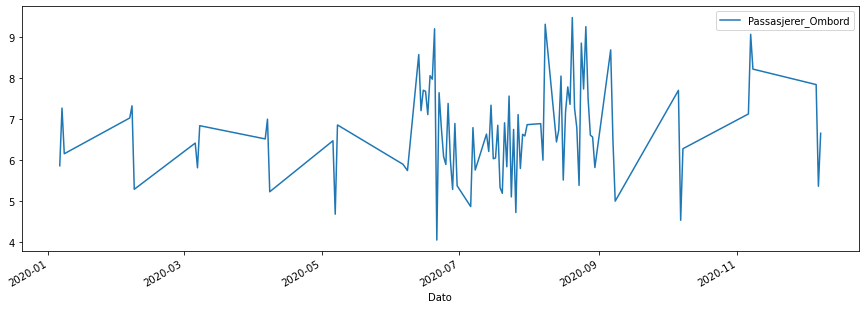

In [32]:
"""Plot the set with Dato as the x-axis and avg number of passengers as y-axis"""

data1.plot.line(figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

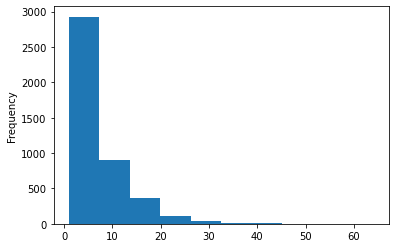

In [33]:
"""A histogram showing the frequency of Passasjerer_Ombord"""

new_data['Passasjerer_Ombord'].plot.hist()

# Feature - Passengers per municipality

In [44]:
"The goal here is to show the frequency of travels from each kommune"
"Gathering data from Ruter_data2.csv"

"We only need the 'Kommuner' column for this task"
ruterData = panda.read_csv("Ruter_data2.csv",delimiter=';', usecols=[4])

FileNotFoundError: [Errno 2] No such file or directory: 'Ruter_data2.csv'

In [45]:
"Checking that the table is correct"
ruterData.head(10)

NameError: name 'ruterData' is not defined

NameError: name 'ruterData' is not defined

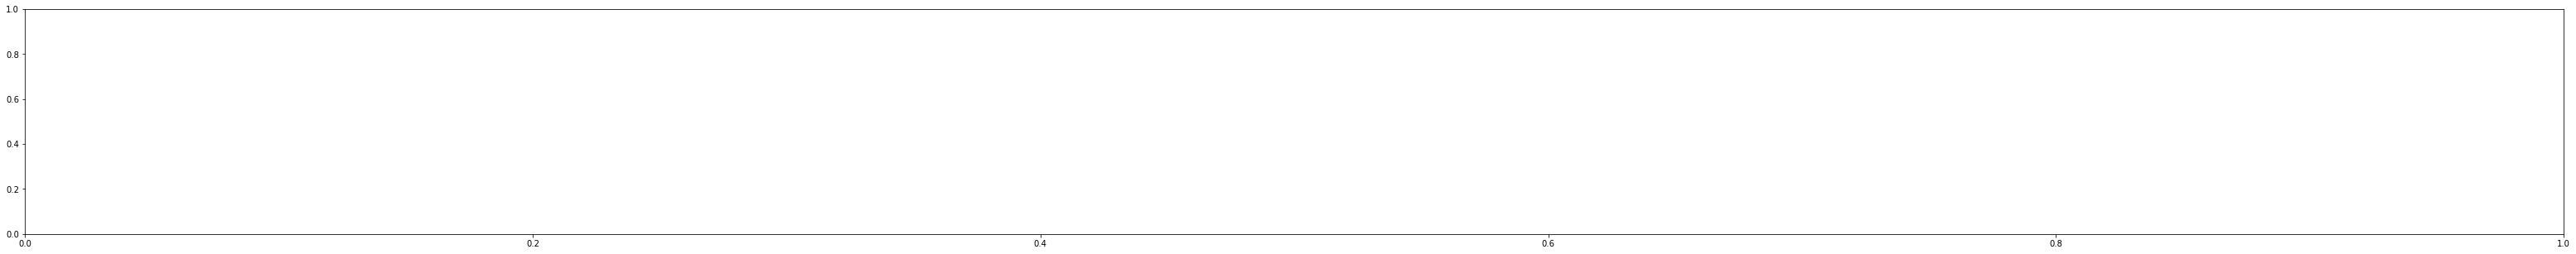

In [47]:
"Creating a new figure"
fig = plt.figure(figsize=(55,5))
ax = fig.add_subplot(111)

"Counting number of unique 'Kommuner' to decide number of 'bins' in the histogram"
from collections import Counter
import collections
kommuneList = ruterData['Kommune'].values.tolist()

total = len(set(kommuneList)) #counts frequency

"Ordering the 'Kommuner by frequency so the histogram looks a bit cleaner"
counts = collections.Counter(kommuneList)
ordered_list = sorted(kommuneList, key=counts.get, reverse=True)

plt.hist(ordered_list, bins=total, rwidth=40, align='left', edgecolor='black', linewidth=2)

"Labeling the histogram"
plt.xlabel('Kommune')
plt.ylabel('Antall turer')
plt.title('Reiser per kommune')
plt.show()